In [2]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
all_data = pd.read_csv('./all_data1all3.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(all_data["label"])
all_data["label"] = label
all_data

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,2X,2Y,2Z,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,2Mag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456754,0,99.065435,0
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,0
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279776,0,99.455316,0
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,0
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,1.634981,9.675176,0.571712,1.424729,9.680670,-0.137044,2.317456,3.162076,2.663163,0.984920,...,10.743226,22.767045,119.070444,77.191411,9.756531,526.605675,516.849143,0,119.070444,1
3195,0.024351,9.846186,0.012902,0.112443,9.820437,-0.388864,2.188469,3.014187,2.905252,-0.370210,...,16.535442,26.763433,119.262972,76.504228,0.654602,627.621581,626.966979,0,119.262972,1
3196,0.922415,9.858990,0.537263,0.838491,10.017472,-0.104868,2.124396,3.160946,3.103680,0.506166,...,16.363878,27.488127,122.476247,86.439565,5.432543,609.133832,603.701288,0,122.476247,1
3197,-0.194713,9.920477,0.347196,0.069789,9.875457,-0.178162,2.908753,2.944075,2.564336,-1.093212,...,16.409150,28.539022,122.278158,84.649215,6.421978,657.409980,650.988002,0,122.278158,1


In [3]:
_all_data_x = []
_all_data_y = []    
count = all_data.shape[0] 
count1 = all_data.shape[1]

for i in range(0,count):
    _all_data_x.append(all_data.iloc[i, 0:58])
    _all_data_y.append(all_data.iloc[i, 58:59])

In [4]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(_all_data_x, _all_data_y, test_size=0.2, random_state=42)

In [5]:
# Features
feature_number = len(X_train[0])
print(feature_number)

58


In [6]:
y_train = np.array(y_train)

In [7]:
y_train.shape

(2559, 1)

In [8]:
X_train = np.array(X_train)
X_train.shape

(2559, 58)

In [9]:
# Training Keras model
regressor = keras.Sequential()
regressor.add(layers.InputLayer(input_shape=(feature_number,)))
regressor.add(layers.Dense(units=64,activation = 'relu'))
regressor.add(layers.Dense(units=1,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
results=regressor.fit(X_train, y_train, epochs = 400)

Epoch 1/400
80/80 [==============================] - 0s 802us/step - loss: 115.5214
Epoch 2/400
80/80 [==============================] - 0s 740us/step - loss: 5.7444
Epoch 3/400
80/80 [==============================] - 0s 808us/step - loss: 2.5794
Epoch 4/400
80/80 [==============================] - 0s 772us/step - loss: 1.5642
Epoch 5/400
80/80 [==============================] - 0s 911us/step - loss: 1.1319
Epoch 6/400
80/80 [==============================] - 0s 757us/step - loss: 0.8921
Epoch 7/400
80/80 [==============================] - 0s 666us/step - loss: 0.8215
Epoch 8/400
80/80 [==============================] - 0s 688us/step - loss: 0.5980
Epoch 9/400
80/80 [==============================] - 0s 685us/step - loss: 0.5320
Epoch 10/400
80/80 [==============================] - 0s 687us/step - loss: 0.4574
Epoch 11/400
80/80 [==============================] - 0s 657us/step - loss: 0.4590
Epoch 12/400
80/80 [==============================] - 0s 641us/step - loss: 0.3963
Epoch 13/40

80/80 [==============================] - 0s 589us/step - loss: 0.1617
Epoch 100/400
80/80 [==============================] - 0s 553us/step - loss: 0.1179
Epoch 101/400
80/80 [==============================] - 0s 620us/step - loss: 0.1408
Epoch 102/400
80/80 [==============================] - 0s 554us/step - loss: 0.1244
Epoch 103/400
80/80 [==============================] - 0s 550us/step - loss: 0.3055
Epoch 104/400
80/80 [==============================] - 0s 603us/step - loss: 0.2312
Epoch 105/400
80/80 [==============================] - 0s 603us/step - loss: 0.1889
Epoch 106/400
80/80 [==============================] - 0s 586us/step - loss: 0.1774
Epoch 107/400
80/80 [==============================] - 0s 585us/step - loss: 0.9918
Epoch 108/400
80/80 [==============================] - 0s 605us/step - loss: 0.2894
Epoch 109/400
80/80 [==============================] - 0s 617us/step - loss: 0.1893
Epoch 110/400
80/80 [==============================] - 0s 648us/step - loss: 0.1982
Epoch 

80/80 [==============================] - 0s 615us/step - loss: 0.0443
Epoch 197/400
80/80 [==============================] - 0s 606us/step - loss: 0.0879
Epoch 198/400
80/80 [==============================] - 0s 614us/step - loss: 0.0627
Epoch 199/400
80/80 [==============================] - 0s 600us/step - loss: 0.0563
Epoch 200/400
80/80 [==============================] - 0s 674us/step - loss: 0.0333
Epoch 201/400
80/80 [==============================] - 0s 659us/step - loss: 0.0472
Epoch 202/400
80/80 [==============================] - 0s 651us/step - loss: 0.2663
Epoch 203/400
80/80 [==============================] - 0s 681us/step - loss: 0.1125
Epoch 204/400
80/80 [==============================] - 0s 691us/step - loss: 0.2299
Epoch 205/400
80/80 [==============================] - 0s 603us/step - loss: 0.1217
Epoch 206/400
80/80 [==============================] - 0s 551us/step - loss: 0.1622
Epoch 207/400
80/80 [==============================] - 0s 547us/step - loss: 0.4600
Epoch 

80/80 [==============================] - 0s 660us/step - loss: 0.1589
Epoch 294/400
80/80 [==============================] - 0s 648us/step - loss: 0.0850
Epoch 295/400
80/80 [==============================] - 0s 665us/step - loss: 0.1043
Epoch 296/400
80/80 [==============================] - 0s 597us/step - loss: 0.1072
Epoch 297/400
80/80 [==============================] - 0s 580us/step - loss: 0.1300
Epoch 298/400
80/80 [==============================] - 0s 626us/step - loss: 0.1770
Epoch 299/400
80/80 [==============================] - 0s 624us/step - loss: 0.1635
Epoch 300/400
80/80 [==============================] - 0s 577us/step - loss: 0.5012
Epoch 301/400
80/80 [==============================] - 0s 616us/step - loss: 0.3660
Epoch 302/400
80/80 [==============================] - 0s 564us/step - loss: 0.1822
Epoch 303/400
80/80 [==============================] - 0s 705us/step - loss: 0.1561
Epoch 304/400
80/80 [==============================] - 0s 655us/step - loss: 0.1477
Epoch 

80/80 [==============================] - 0s 647us/step - loss: 1.2095
Epoch 391/400
80/80 [==============================] - 0s 668us/step - loss: 0.3416
Epoch 392/400
80/80 [==============================] - 0s 644us/step - loss: 0.1280
Epoch 393/400
80/80 [==============================] - 0s 643us/step - loss: 0.0787
Epoch 394/400
80/80 [==============================] - 0s 612us/step - loss: 0.0513
Epoch 395/400
80/80 [==============================] - 0s 704us/step - loss: 0.0211
Epoch 396/400
80/80 [==============================] - 0s 722us/step - loss: 0.0204
Epoch 397/400
80/80 [==============================] - 0s 712us/step - loss: 0.0615
Epoch 398/400
80/80 [==============================] - 0s 743us/step - loss: 0.0239
Epoch 399/400
80/80 [==============================] - 0s 776us/step - loss: 0.0355
Epoch 400/400
80/80 [==============================] - 0s 748us/step - loss: 0.0141


In [11]:
# Converting X_test and y_test in numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)
y_pred= regressor.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

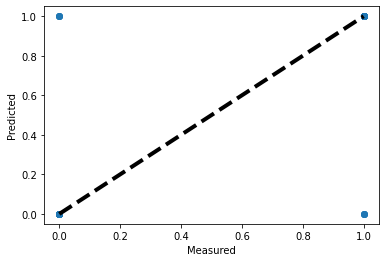

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
accuracy_score(y_test, y_pred)

0.990625

In [14]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
matrix_index = ["No-Fall","Fall"]

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

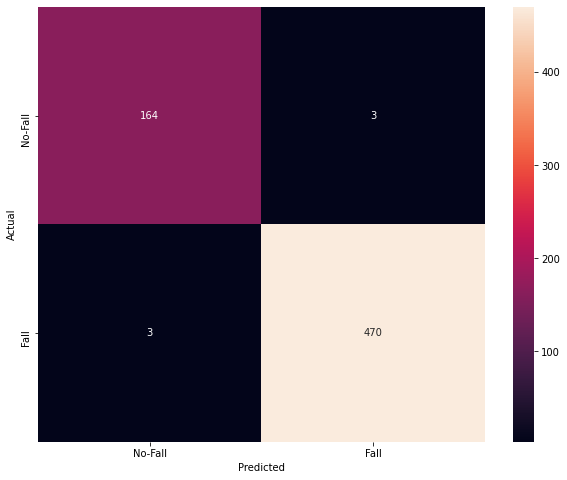

In [16]:
import seaborn as sns
annot = np.empty_like(cm).astype(str)
# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_cm,annot=annot, fmt='')

In [17]:
print("classification results: \n",classification_report(y_test, y_pred))

classification results: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       167
         1.0       0.99      0.99      0.99       473

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



In [18]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
tflite_model = converter.convert()

# Save the TF Lite model.
open('ml_fall_model.tflite', 'wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/folders/xs/m65qzvws67z1kzdjg50c_9dw0000gn/T/tmp9cn4j5_7/assets


16500

In [19]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [20]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array([[ -5.568553139,-0.2176354,6.616517364,-6.14831,-0.676445955,7.363430104,2.473055478,3.530614113,1.962967643,1.0751715,0.685424684,-1.548385003,5.515144248,4.745380353,9.152159584,-18.62200831,-18.92248977,-8.725407005,6.864371745,16.02666315,18.42691566,51.07100434,0.004057261,0.42382406,1.85990684,3.944417716,1.514838706,1.982302809,1.301824793,5.7581537,2.139199848,6.64858383,6.14831,0.700429281,7.363668127,1.991813132,2.816741745,1.851392035,0.076331442,2.21053883,-0.991061417,6.73227767,5.245096613,5.793986403,0.040386163,0.03791706,0.941755908,18.62200831,18.92248977,18.42691566,31.74326038,97.25709386,56.15712605,2.593038885,961.6895929,959.096554,0,97.25709386]], dtype = 'float32')
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.


In [22]:
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [23]:
tf_results = regressor.predict(input_data)

In [24]:
tf_results

array([[0.07201418]], dtype=float32)

In [25]:
tflite_results

array([[0.07203326]], dtype=float32)